Assignment 1 Hacktiv8 - Visualisasi Data london crime by lsoa (wilayah)

**SUSUNAN VISUALISASI DATA**

*1. Area Plot*

*2. Bar Chart*

*3. Line Chart*
*4. Histogram*

*5. Pie Chart*

*6. Boxplot*

*7. Scatter Plot*

*8. Word Cloud*

*9. Folium Map*

In [1]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

data yang dipakai berasal dari kaggle : https://www.kaggle.com/datasets/jboysen/london-crime

# Membaca Data

In [2]:
#Membaca dan menampilkan data kriminal di london
df = pd.read_csv("dataset/london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Dapat dilihat dari data yang ditampilkan di atas bahwa dataset ini memiliki 13.490.604 baris dan 7 kolom. Penjelasan mengenai setiap kolom berada di bawah ini:

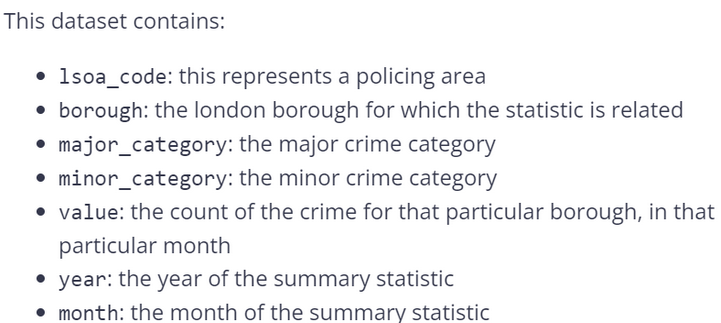

* melambangkan wilayah kepolisian (kode wilayah)
* wilayah london yang terkait dengan statistik
* kategori kejahatan besar
* kategori kejahatan kecil
* hitungan kejahatan untuk wilayah tertentu, pada bulan tertentu
* tahun ringkasan statistik
* bulan

## Melihat Data Teratas

In [3]:
df.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Melihat Data Terbawah

In [4]:
df.tail(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


## Melihat Informasi Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Melihat Nilai NULL pada DATASET

In [6]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Dataset tidak memiliki missing value

## Melihat Dimensi Baris dan Kolom

In [7]:
df.shape

(13490604, 7)

##### Data london_crime_by_lsoa memiliki 13.490.604 data dan tidak memiliki missing value

## Melihat Informasi Statistika Dataset

In [8]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Mengubah Nama Kolom

In [9]:
df.rename(columns={'value':'total'}, inplace=True)

Pengubahan nama kolom ini dilakukan karena kolom *value* lebih cocok dikatakan sebagai *total* kejahatan pada tahun dan bulan tertentu.

## Menghapus kolom yang kurang penting

In [10]:
df.drop(['lsoa_code'], axis=1, inplace=True)

In [11]:
df

,borough,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


## Menghitung count dari kolom borough, major_category, minor_category, dan year

In [12]:
df.borough.value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [13]:
df.major_category.value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [14]:
df.minor_category.value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [15]:
df.year.value_counts()

2016    1498956
2015    1498956
2008    1498956
2012    1498956
2010    1498956
2013    1498956
2014    1498956
2011    1498956
2009    1498956
Name: year, dtype: int64

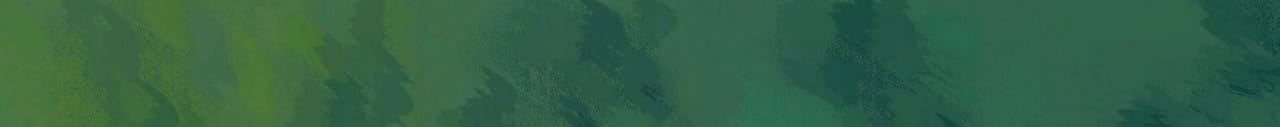

## Area Plot

In [16]:
df.head()

,borough,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [17]:
# membuat variabel baru yang menyimpan data tahun >= 2012 berdasarkan kejahatan
# terbesar dan total per tahun
major = df[(df['year'] >= 2012)].groupby(['major_category','year'])['total'].sum()
major

major_category               year
Burglary                     2012     93392
                             2013     87222
                             2014     76053
                             2015     70489
                             2016     68285
Criminal Damage              2012     62158
                             2013     56206
                             2014     59279
                             2015     62976
                             2016     64071
Drugs                        2012     51776
                             2013     50278
                             2014     44435
                             2015     39785
                             2016     38914
Fraud or Forgery             2012         0
                             2013         0
                             2014         0
                             2015         0
                             2016         0
Other Notifiable Offences    2012     10675
                             2013     1081

### Mengelompokkan 7 crime major_category yang berada pada year >= 2012

In [18]:
#melihat 7 data kejahatan terbesar
df['major_category'].value_counts().head(7)

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Name: major_category, dtype: int64

In [19]:
#Mengelompokkan kejahatan dan menghitung total berdasarkan tahun 
thefthand = major['Theft and Handling']
df_thefthand = thefthand.to_frame()
df_thefthand.rename(columns={'total':'Theft and Handling'}, inplace = True)
df_thefthand

,Theft and Handling
year,
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


In [20]:
#Mengelompokkan kejahatan dan menghitung total berdasarkan tahun
violence = major['Violence Against the Person']
df_violence = violence.to_frame()
df_violence.rename(columns={'total':'Violence Against the Person'}, inplace = True)
df_violence

,Violence Against the Person
year,
2012,150014
2013,146181
2014,185349
2015,218740
2016,232381


In [21]:
#Mengelompokkan kejahatan dan menghitung total berdasarkan tahun
crimdamage = major['Criminal Damage']
df_crimdamage = crimdamage.to_frame()
df_crimdamage.rename(columns={'total':'Criminal Damage'}, inplace = True)
df_crimdamage

,Criminal Damage
year,
2012,62158
2013,56206
2014,59279
2015,62976
2016,64071


In [22]:
#Mengelompokkan kejahatan dan menghitung total berdasarkan tahun
drugs = major['Drugs']
df_drugs = drugs.to_frame()
df_drugs.rename(columns={'total':'Drugs'}, inplace = True)
df_drugs

,Drugs
year,
2012,51776
2013,50278
2014,44435
2015,39785
2016,38914


In [23]:
#Mengelompokkan kejahatan dan menghitung total berdasarkan tahun
burglary = major['Burglary']
df_burglary = burglary.to_frame()
df_burglary.rename(columns={'total':'Burglary'}, inplace = True)
df_burglary

,Burglary
year,
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


In [24]:
#Mengelompokkan kejahatan dan menghitung total berdasarkan tahun
robbery = major['Robbery']
df_robbery = robbery.to_frame()
df_robbery.rename(columns={'total':'Robbery'}, inplace = True)
df_robbery

,Robbery
year,
2012,35260
2013,29337
2014,22150
2015,21383
2016,22528


In [25]:
#Mengelompokkan kejahatan dan menghitung total berdasarkan tahun
notifoff = major['Other Notifiable Offences']
df_notifoff = notifoff.to_frame()
df_notifoff.rename(columns={'total':'Other Notifiable Offences'}, inplace = True)
df_notifoff

,Other Notifiable Offences
year,
2012,10675
2013,10811
2014,13037
2015,14229
2016,15809


**Code di atas kemudian digabungkan menjadi 1 df untuk dilihat visualisasinya**

In [26]:
# menggabungkan variabel - variabel yang menyimpan data frame baru
# syntax dibawah ini tidak memakai axis = 1 sehingga tampilannya sebagai berikut

df7 = pd.concat([df_thefthand, df_violence,df_crimdamage,
                 df_drugs, df_burglary, df_robbery, df_notifoff])
df7

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary,Robbery,Other Notifiable Offences
year,,,,,,,
2012,334054.0,NaN,NaN,NaN,NaN,NaN,NaN
2013,306372.0,NaN,NaN,NaN,NaN,NaN,NaN
2014,279880.0,NaN,NaN,NaN,NaN,NaN,NaN
2015,284022.0,NaN,NaN,NaN,NaN,NaN,NaN
2016,294133.0,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,150014.0,NaN,NaN,NaN,NaN,NaN
2013,NaN,146181.0,NaN,NaN,NaN,NaN,NaN
2014,NaN,185349.0,NaN,NaN,NaN,NaN,NaN
2015,NaN,218740.0,NaN,NaN,NaN,NaN,NaN


In [27]:
# setelah ditambahkan axis=1
# axis =1 berguna untuk mengitung larik sepanjang kolom

df7 = pd.concat([df_thefthand, df_violence,df_crimdamage,
                 df_drugs, df_burglary, df_robbery, df_notifoff], axis=1)
df7

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary,Robbery,Other Notifiable Offences
year,,,,,,,
2012,334054,150014,62158,51776,93392,35260,10675
2013,306372,146181,56206,50278,87222,29337,10811
2014,279880,185349,59279,44435,76053,22150,13037
2015,284022,218740,62976,39785,70489,21383,14229
2016,294133,232381,64071,38914,68285,22528,15809


### Tampilan Area Plot

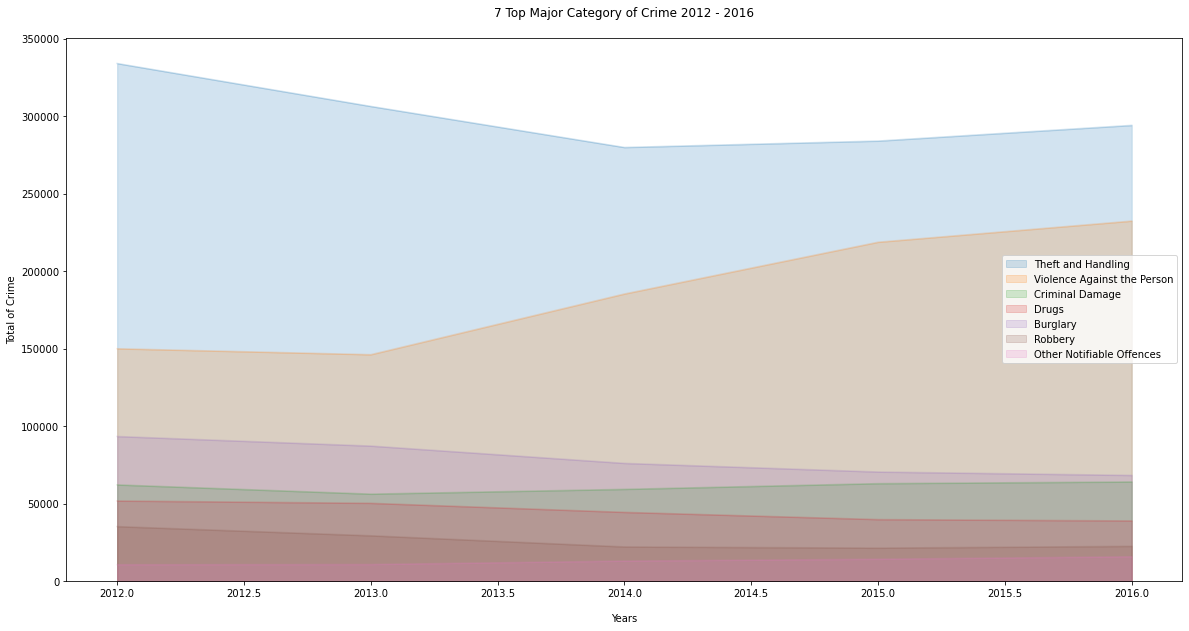

In [28]:
df7.plot(kind='area', alpha=0.20, stacked=False, figsize=(20,10))
plt.title('7 Top Major Category of Crime 2012 - 2016\n')
plt.ylabel('Total of Crime')
plt.xlabel('\nYears')
plt.show()

**Area plot merupakan plot yang berisi representasi grafis dari nilai dalam data series dan juga berguna menampilkan tren atau perubahan pola dari waktu ke waktu**

+ Pada Code di atas, kind='area' untuk mendefinisikan jenis plot yang diinginkan
+ alpha digunakan untuk mengatur transparansi dari plot yang ditampilkan
+ stacked artinya bertumpuk, jika memberi input False - hasil yang diberikan akan sebaliknya.
+ figsize berguna untuk mengatur ukuran gambar plot

Pada visualisasi Area Plot yang telah dibuat dapat dilihat bahwa Theft and Handling merupakan kategori kejahatan yang paling besar walaupun terjadi penurunan tingkat kejahatan pada tahun 2014.

Category Violence merupakan kategori kejahatan kedua yang tertinggi dan selalu meningkat setiap tahunnya

Sedangkan kejahatan lainnya tampak stabil dan bahkan menurun setiap tahunnya

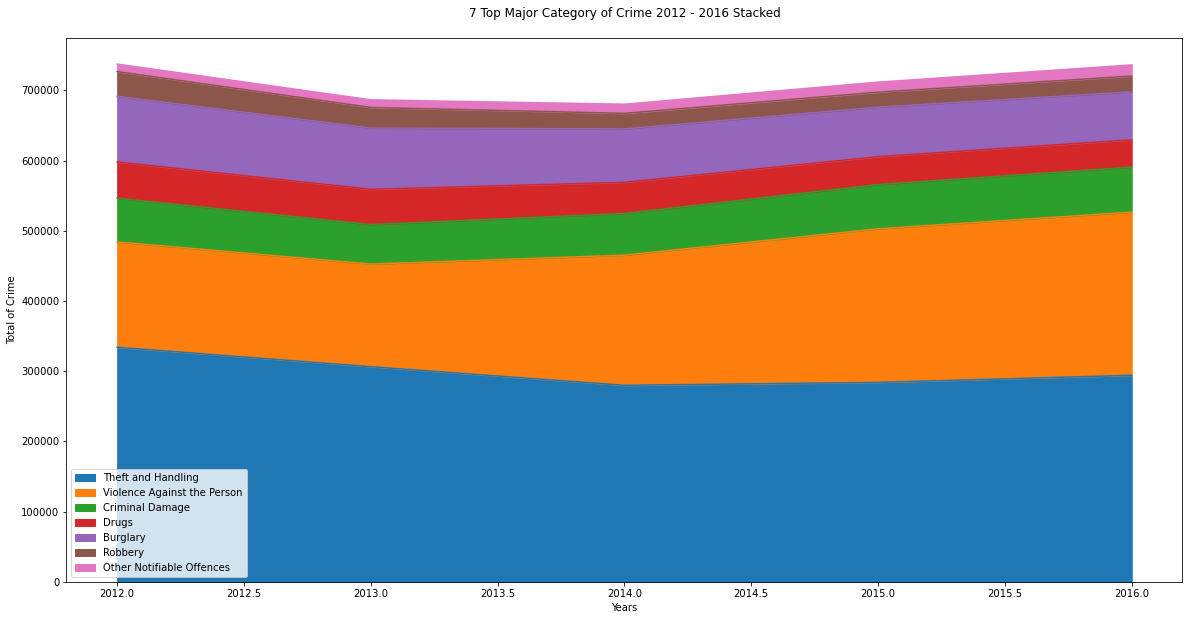

In [29]:
df7.plot(kind='area', stacked=True, figsize=(20,10))
plt.title('7 Top Major Category of Crime 2012 - 2016 Stacked\n')
plt.ylabel('Total of Crime')
plt.xlabel('Years')
plt.show()

+ Visualisasi di atas merupakan area plot menggunakan stacked = True, hal ini untuk melihat proporsi data visualisasi

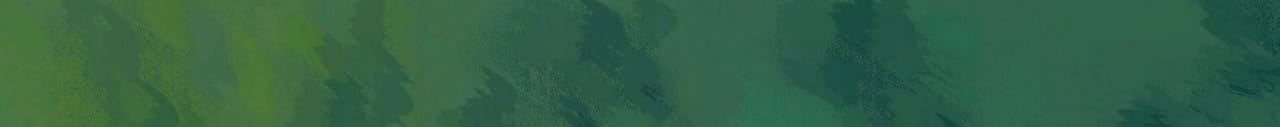

## Bar Chart

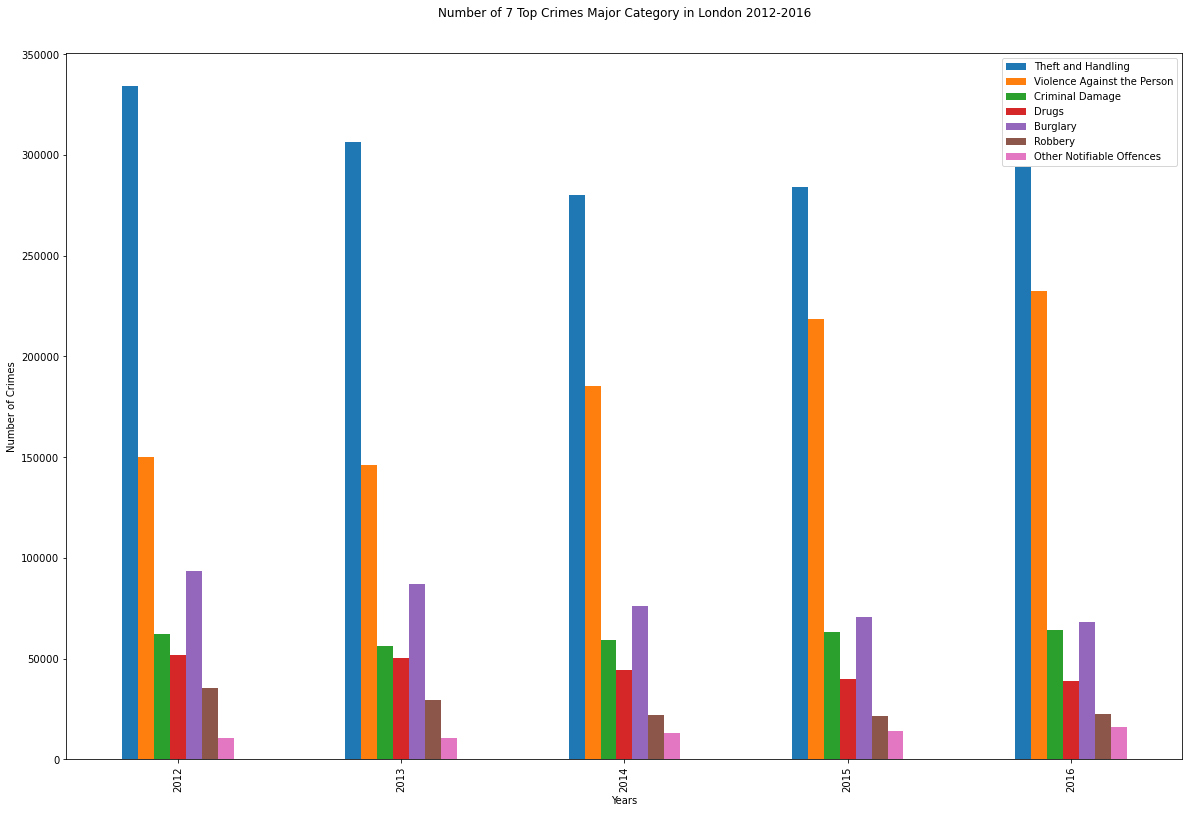

In [30]:
df7.plot(kind='bar', legend=True, figsize=(20,13))
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.title('Number of 7 Top Crimes Major Category in London 2012-2016\n\n')
plt.show()

**Bar Chart merupakan alat visualisasi yang memudahkan untuk membandingkan data dari kategori yang berbeda untuk melihat kenaikan atau penurunan pada periode waktu tertentu**

Pada bar ini dapat dilihat kenaikan dan penurunan dari 7 major category kejatan dari tahun 2012 - 2016.

Beberapa kejahatan banyak menurun pada tahun 2014, hal ini bisa saja karena faktor ekonomi masyarakat london yang membaik sehingga kasus kriminal menurun ataupun penanganan masyarakat dan pemerintah yang cepat tanggap dalam menangani kasus kriminal

Kasus kejahatan bagi Theft and Handling paling besar berada pada tahun 2012 dan paling sedikit pada tahun 2014. Sedangkan kejahatan Violence Against the Person terus meningkat setiap tahunnya seperti yang dilihat pada visualisasi **Area Chart**

**Melihat Banyaknya Kasus Pada Tahun Terendah Kriminal (2014)**

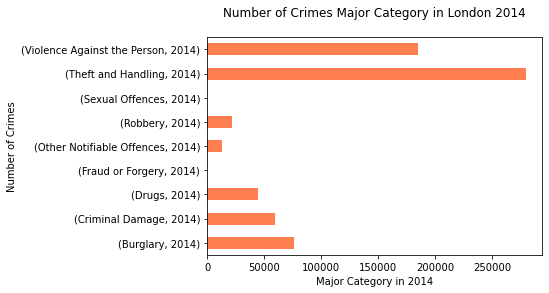

In [31]:
major_b = df[(df['year'] == 2014)].groupby(['major_category','year'])['total'].sum()
major_b.plot(kind='barh', color='coral')

plt.xlabel('Major Category in 2014')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Major Category in London 2014\n')
plt.show()

**Jika data yang ditampilkan sedikit, maka tidak perlu memakai barh atau horizontal bar, namun cukup vertikal saja**

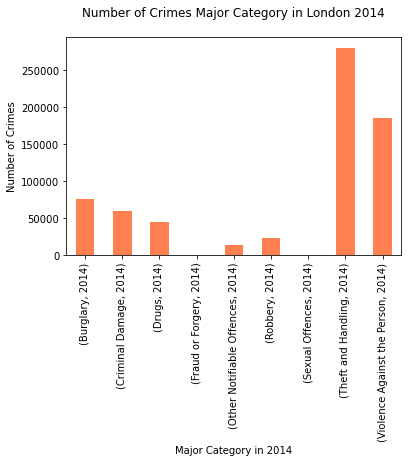

In [32]:
major_b = df[(df['year'] == 2014)].groupby(['major_category','year'])['total'].sum()
major_b.plot(kind='bar', color='coral')

plt.xlabel('Major Category in 2014')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Major Category in London 2014\n')
plt.show()

+ Membuat variabel baru yang menyimpan data tahun = 2014 berdasarkan kejahatan terbesar dan total per tahun
+ Pada Code di atas, kind='bar' untuk mendefinisikan jenis plot yang diinginkan
+ color berguna untuk memilih dan membuat warna yang diinginkan

Pada visualisasi bar chart di atas dapat dilihat keseluruhan **major_category** pada data kriminal di tahun 2014.

Tidak terdapat Sexual Offences dan Fraud or Forgery pada tahun 2014. Hal ini bisa jadi gambaran bahwa masyarakat london tidak melakukan pelecehan seksual dan penipuan. Tetapi lebih sering melakukan pencurian dan kekerasan.

Pencurian dan kekerasan ini erat kaitannya terhadap suatu kejahatan.

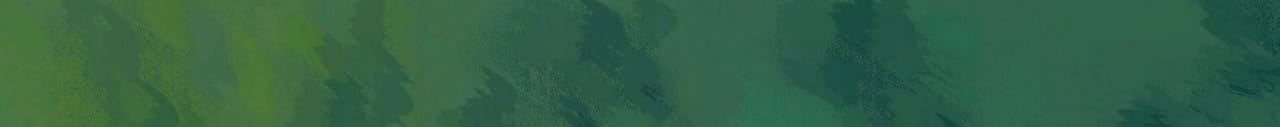

**Selanjutnya melihat 3 data terbawah yaitu Drugs, Robbery dan Other Notifiable Offences dari 7 data terbesar kasus kejahatan major_category**

## Line Chart

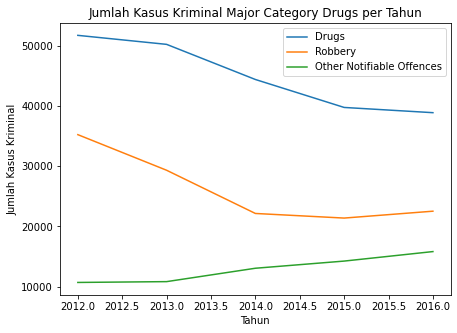

In [33]:
df3_line = pd.concat([df_drugs, df_robbery, df_notifoff], axis=1)
df3_line.plot(kind='line', figsize=(7,5))
plt.title('Jumlah Kasus Kriminal Major Category Drugs per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Kriminal')
plt.show()

**Line Chart berfungsi untuk menampilkan  trend data atau perubahan suatu kondisi dari waktu ke waktu (rentang) secara kontinu**

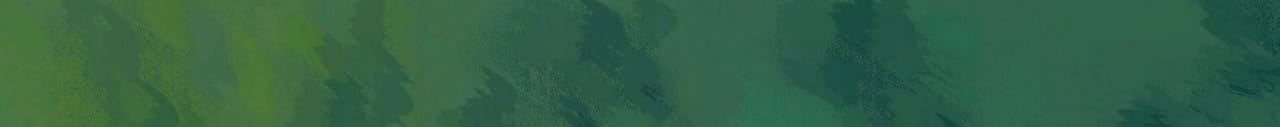

**Kemudian, ingin dilihat kasus major_category terbesar ke 5 dan 6 yaitu Drugs dan robbery pada tahun 2012 - 2016**

## Histogram

In [34]:
df2_hist = pd.concat([df_drugs, df_robbery], axis=1)
df2_hist

,Drugs,Robbery
year,,
2012,51776,35260
2013,50278,29337
2014,44435,22150
2015,39785,21383
2016,38914,22528


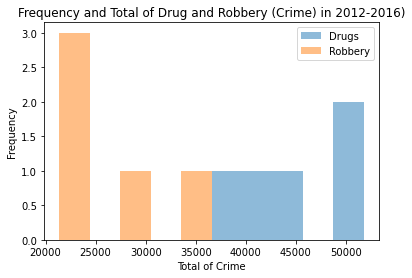

In [35]:
df2_hist.plot(kind='hist', alpha=0.50)

plt.xlabel('Total of Crime')
plt.ylabel('Frequency')
plt.title('Frequency and Total of Drug and Robbery (Crime) in 2012-2016)')
plt.show()

**Histogram adalah jenis grafik yang menjelaskan frekuensi berdasarkan dua data numerik untuk melihat frekuensi dari data-data numerik yang bersifat kontinu**

Histogram di atas menampilkan persebaran 2 data yaitu Drugs dan Robbery pada tahun 2012 - 2016.

Beberapa data tersebut tersebar secara baik, sehingga dapat dilihat bahwa, untuk data Drugs terdapat hampir 2 data yang berada pada rentang 45.000 s.d > 50.000 serta 1 data yang berada pada rentang 35.000 s.d > 45.000. 

Data Robbery memiliki frekuensi 3 pada rentang antara 20.000 dan 25.000 dan 1 frekuensi data pada < 30.000 serta 1 data pada rentang sebelum dan sesudah 50.000


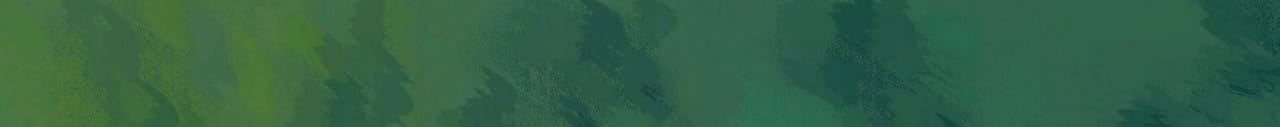

**Kemudian, ingin dilihat proporsi 10 data borough dengan kejahatan terbanyak dari tahun 2012 - 2016**

## Pie Chart

In [36]:
df_1216 = df.query('year >= 2012 and year <= 2016')
df_1216

,borough,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,Ealing,Theft and Handling,Other Theft,0,2012,5
...,...,...,...,...,...,...
13490597,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6


Fungsi query() digunakan untuk memfilter data kolom year dari tahun 2012 sampai 2016. Fungsi query sama seperti [] namun lebih mudah untuk dibaca kode nya

In [37]:
dfborough = df_1216.groupby(['borough'])[['total']].sum().reset_index()

dfborough = dfborough.rename(columns={'total':'total of crime'})
dfborough

,borough,total of crime
0,Barking and Dagenham,80262
1,Barnet,117375
2,Bexley,59895
3,Brent,126118
4,Bromley,99036
5,Camden,145765
6,City of London,711
7,Croydon,141791
8,Ealing,133101
9,Enfield,108904


Dilakukan grouping kolom borough dan total dari seluruh crime yang terjadi di wilayah tersebut dengan sum(). Kemudian mengubah kolom total menjadi total of crime. serta dilakukan reset index yang awalnya berupa borough menjadi index angka biasa

In [38]:
dfborough = dfborough.sort_values(by=['total of crime'], ascending=False)
dfborough

,borough,total of crime
32,Westminster,256367
21,Lambeth,164341
27,Southwark,152673
5,Camden,145765
24,Newham,144956
7,Croydon,141791
29,Tower Hamlets,135292
8,Ealing,133101
11,Hackney,132827
18,Islington,128855


Dilakukan pengurutan kolom dari yang terbesar ke terkecil agar lebih mudah melihat wilayah yang memiliki total kejahatan terbanyak

In [39]:
dfborough_top10 = dfborough.head(10)
dfborough_top10

,borough,total of crime
32,Westminster,256367
21,Lambeth,164341
27,Southwark,152673
5,Camden,145765
24,Newham,144956
7,Croydon,141791
29,Tower Hamlets,135292
8,Ealing,133101
11,Hackney,132827
18,Islington,128855


Menyimpan 10 data teratas wilayah dengan total kejahatan terbanyak pada variabel baru

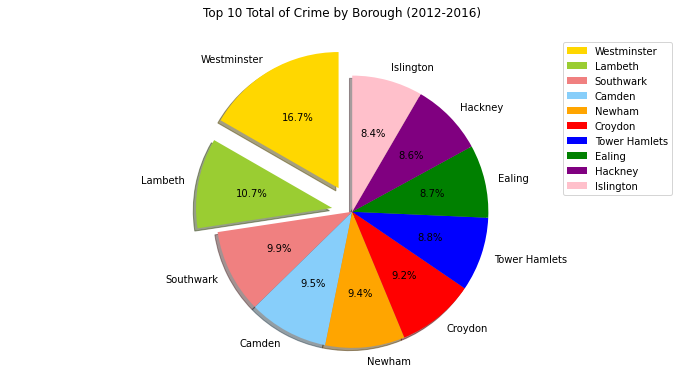

In [40]:
plt.figure(figsize=(12,6))
explode_list = [0.20,0.15,0,0,0,0,0,0,0, 0]

plt.pie(dfborough_top10['total of crime'],
        labels=dfborough_top10['borough'],
        colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',
                'orange', 'red', 'blue', 'green', 'purple', 'pink'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        explode=explode_list)

plt.title('Top 10 Total of Crime by Borough (2012-2016)\n')
plt.axis('equal')
plt.legend(labels=dfborough_top10['borough'])
plt.show()

**Pie Chart berguna untuk memperlihatkan proporsi suatu nilai data terhadap keseluruhan nilai**

Dilakukan visualisai pie chart terhadap 10 data teratas wilayah dengan kejahatan terbanyak berdasarkan total kejahatan.

+ labels berguna untuk memberikan penanda bagi masing-masing plot yang telah divisualkan
+ colors untuk mengatur warna dari chart
+ autopct berguna untuk menampilkan persentase dari pie chart
+ shadow untuk mengatur bayangan dan startangle untuk mengatur sudut pie
+ explodde berguna memperluas bagan pie chart sesuai dengan lost yang telah diinput

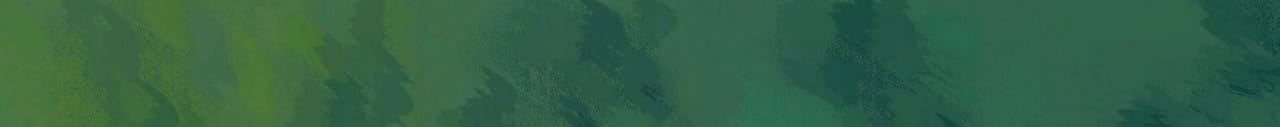

**Melihat penyebaran data dari 10 wilayah dengan total kejahatan terbanyak pada tahun 2012 - 2016**

## Box Plot

In [41]:
dfborough = df_1216.groupby(['borough'])[['total']].sum()

dfborough = dfborough.rename(columns={'total':'total of crime'})
dfborough

,total of crime
borough,
Barking and Dagenham,80262
Barnet,117375
Bexley,59895
Brent,126118
Bromley,99036
Camden,145765
City of London,711
Croydon,141791
Ealing,133101


Dilakukan grouping kolom borough dan total dari seluruh crime yang terjadi di wilayah tersebut dengan sum(). Kemudian mengubah kolom total menjadi total of crime

In [42]:
dfborough = dfborough.sort_values(by=['total of crime'], ascending=False)
dfborough

,total of crime
borough,
Westminster,256367
Lambeth,164341
Southwark,152673
Camden,145765
Newham,144956
Croydon,141791
Tower Hamlets,135292
Ealing,133101
Hackney,132827


Dilakukan pengurutan kolom dari yang terbesar ke terkecil agar lebih mudah melihat wilayah yang memiliki total kejahatan terbanyak

In [43]:
dfborough_top10 = dfborough.head(10)
dfborough_top10

,total of crime
borough,
Westminster,256367
Lambeth,164341
Southwark,152673
Camden,145765
Newham,144956
Croydon,141791
Tower Hamlets,135292
Ealing,133101
Hackney,132827


Menyimpan 10 data teratas wilayah dengan total kejahatan terbanyak pada variabel baru

In [44]:
dfborough_top10.describe()

,total of crime
count,10.00000
mean,153596.80000
std,37641.68413
min,128855.00000
25%,133648.75000
50%,143373.50000
75%,150946.00000
max,256367.00000


method describe() berguna untuk menghasilkan informasi statistik pada Data Frame 10 wilayah dengan total kejahatan terbanyak

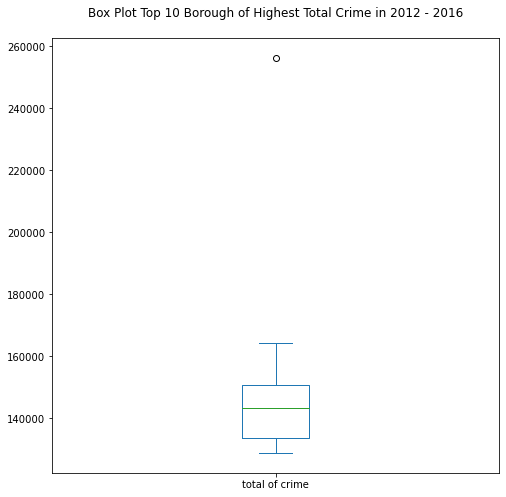

In [45]:
dfborough_top10.plot(kind='box', figsize=(8,8))
plt.title('Box Plot Top 10 Borough of Highest Total Crime in 2012 - 2016\n')
plt.xlabel('')
plt.show()

**Box Plot adalah visualisasi yang menggambarkan data statistik secara grafik data numerik. Hal ini untuk mengetahui kesimetrisan distribusi penyebaran data secara cepat**

**Box Plot memiliki informasi nilai minimumm, Q1, Q2 (Median), Q3, nilai maksimum**

+ terdapat nilai minimum < 140.000. Nilai berada pada kisaran 120.000
+ Pada garis kedua terbawah gambar di atas menggambarkan Q1 atau kuatil terendah berkisar nilai > 130.000
+ Garis ketiga yang berada pada tengah-tengah merupakan garis Q2 (Median) yang berkisar pada nilai 140.000-an
+ garis kedua teratas pada gambar visualisasi menggambarkan kuartil tertinggi dari informasi statistik (Q3)
+ garis teratas merupakan visualisasi dari nilai max data yang telah dikalkulasi secara otomatis oleh library

**Terdapat Outlier pada visualisasi ini, Outlier adalah data yang menyimpang secara ekstrim dari rata-rata kumpulan data**

+ Outlier berada pada sekitar nilai > 250.000

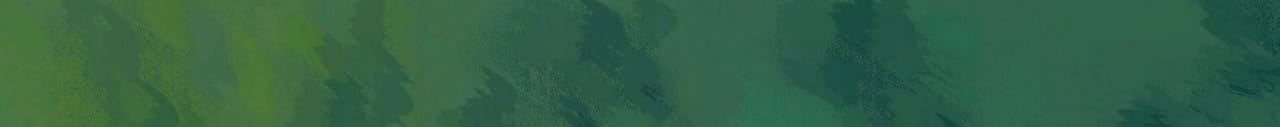

**Kemudian melihat hubungan antar variabel dengan scatter plot. Disini akan dilihat hubungan antara wilayah westminster yang merupakan wilayah dengan kejahatan terbesar dari tahun 2012- 2016 dengan tahun**

## Scatter Plot

In [46]:
# membuat variabel baru yang menyimpan data tahun >= 2012 berdasarkan wilayah dengan kejahatan
# terbanyak dan total per tahun 2012 - 2016
br = df[(df['year'] >= 2012)].groupby(['borough','year'])['total'].sum()
br

borough               year
Barking and Dagenham  2012    15990
                      2013    15759
                      2014    15426
                      2015    16346
                      2016    16741
                              ...  
Westminster           2012    59226
                      2013    53852
                      2014    47564
                      2015    47395
                      2016    48330
Name: total, Length: 165, dtype: int64

Mengelompokkan data wilayah dari tahun >= 2012 berdasarkan tahun dan dihitung total kejahatan berdasarkan kolom total

In [47]:
#Mengelompokkan wilayah westminter dan menghitung total kejahatan berdasarkan tahun 
westminster = br['Westminster']
df_westminster = westminster.to_frame()
df_westminster.rename(columns={'total':'Westminster'}, inplace = True)
df_westminster

,Westminster
year,
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


Membuat dataframe westminsster yang menyimpan informasi tahun dan total kejahatan di wilayah tersebut

In [48]:
df_westminster.reset_index(inplace=True)
df_westminster

,year,Westminster
0,2012,59226
1,2013,53852
2,2014,47564
3,2015,47395
4,2016,48330


Melakukan reset index westminter agar dapat dilakukan plot scatter

Text(0.5, 1.0, 'Scatter Plot Westminster ')

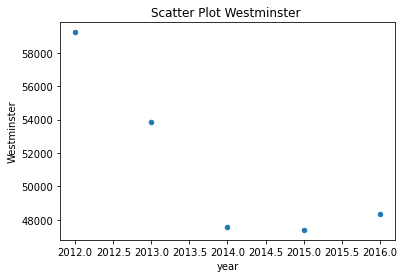

In [49]:
df_westminster.plot(kind='scatter', x='year', y='Westminster')
plt.title("Scatter Plot Westminster ")

**Scatter Plot berfungsi sebagai alat visualisasi yang menemukan pola antar 2 variabel**

Pada plot di atas tidak ditemukan hubungan yang signifikan antara 2 variabel tersebut. Sehingga dapat disimpulkan bahwa keterkaitannya rendah.

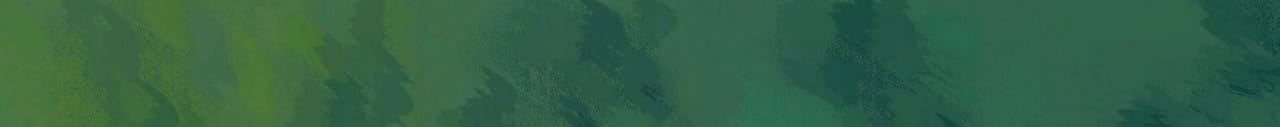

## Word Clouds

In [50]:
# import library
from wordcloud import WordCloud

In [51]:
borough = df['borough'].astype(str).tolist()
text = ' '.join(borough)
wordcloud = WordCloud(width = 1200, height = 1000, background_color = 'white').generate(text)

+ Menyimpan kolom borough pada variabel baru yang telah diubah tipe datanya menjadi string dan diubah ke dalam list.
+ menambahkan variabel text dengan isi ' ' untuk memberikan spasi antara satu kata dengan kata lainnya
+ variabel wordcloud berisi fungsi membuat WordCloud dengan parameter warna, tinggi, lebar dari visualisasi

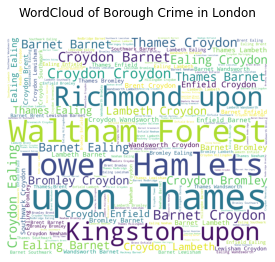

In [52]:
plt.imshow(wordcloud)
plt.title('WordCloud of Borough Crime in London\n')

plt.axis("off")
plt.show()

kemudian, dapat diihat hasil wordcloud dari borough menggunakan plt.imshow dan memasukkan judul serta melakukan off pada axis atau panah dari visualisasi.

Dapat dilihat bahwa wilayah yang paling banyak datanya adalah Upon Thames, Richmons Upon, Waltham Forest

Kata pada wordcloud ini bukan wilayah dengan kejahatan terbanyak, namun juga meliputi wilayah dengan total kejahatan 0 setiap tahunnya

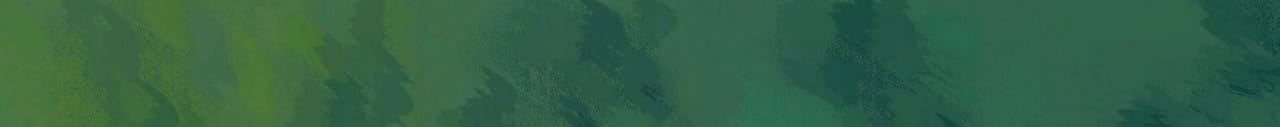

## Folium Maps

In [53]:
import folium

In [54]:
london_folium = folium.Map(location=[51.5072, -0.1275], zoom_start = 10, tiles='Stamen Terrain')
london_folium

+ Membuat Folium Map dengan fungsi folium map dengan parameter latitude dan longitide.
+ Zoom_start mengatur tingkat zoom ketika code di run
+ Tiles menagtur bentuk tampilan peta seperti yang diinginkan

# Kesimpulan

**Dapat disimpulkan dari visualisasi yang telah dibangun bahwa:**
+ Theft and Handling merupakan major_category paling terbanyak pada tahun 2012-2016
+ Violence Against The Person merupakan major_category tingkat 2 tertinggi
+ Criminal Damage menempati posisi ketiga terbanyak kasus kejahatn di london pada tahun 2012 - 2016

**Kemudian**
+ Pada tahum 2014 terjadi penurunan pada beberapa kasus kejahatan major_category
+ Wilayah dengan kasus kejahatan major_category terbanyak adalah Westminster, Lambeth, dan SouthWark
+ Dimana terjadi kasus penurunan tingkat kejahatan pada Westminster pada tahun 2014
+ 3 Daerah yang paling banyak muncul walaupun total kejahatan major_category 0 setiap tahunnya adalah :
    1. Waltham Forest
    2. Tower Halmets
    3. Upon Thames

Tidak ditemukan hubungan yang signifikan antar masing-masing kolom dari data. Namun jika dilakukan hipotesa mungkin akan erat kaitannya dengan kondisi ekonomi, negara, dan kejadian tahun terjadinya kejahatan di London.